In [1]:
from minisom import MiniSom
import pandas as pd

In [2]:
base = pd.read_csv('wines.csv')
X = base.iloc[:,1:14].values
y = base.iloc[:,0].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [4]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [5]:
som._weights
som._activation_map
q = som.activation_response(X)

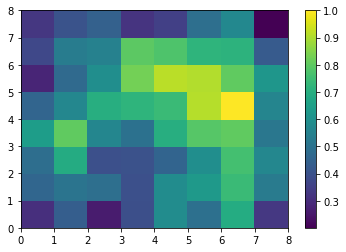

In [6]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()

In [8]:
w = som.winner(X[2])

IndexError: list index out of range

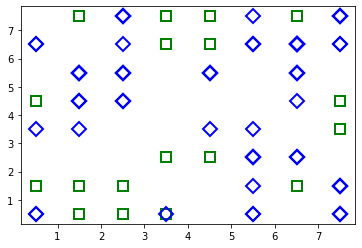

In [9]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

for i, x in enumerate(X):
    #print(i)
    #print(color[y[i]])
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)